In [10]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd 
import yfinance as yf
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from prophet import Prophet

In [29]:
df = yf.download('USDT-USD', start='2016-12-08', end='2022-12-31', progress=False)
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,1.010870,1.013270,0.996515,1.008180,1.008180,358188000
1,2017-11-10,1.006500,1.024230,0.995486,1.006010,1.006010,756446016
2,2017-11-11,1.005980,1.026210,0.995799,1.008990,1.008990,746227968
3,2017-11-12,1.006020,1.105910,0.967601,1.012470,1.012470,1466060032
4,2017-11-13,1.004480,1.029290,0.975103,1.009350,1.009350,767884032
...,...,...,...,...,...,...,...
1873,2022-12-26,0.999934,1.000020,0.999894,0.999995,0.999995,14986560291
1874,2022-12-27,0.999964,1.000019,0.999828,0.999850,0.999850,18554435182
1875,2022-12-28,0.999855,0.999921,0.999652,0.999686,0.999686,21161758512
1876,2022-12-29,0.999679,0.999838,0.999599,0.999735,0.999735,18567214596


In [30]:
df = df[['Date','Close']]
df = df.rename(columns={'Date':'ds','Close':'y'})
df.tail(10)

,ds,y
1868,2022-12-21,1.000077
1869,2022-12-22,1.000011
1870,2022-12-23,0.999981
1871,2022-12-24,0.999992
1872,2022-12-25,0.999943
1873,2022-12-26,0.999995
1874,2022-12-27,0.999850
1875,2022-12-28,0.999686
1876,2022-12-29,0.999735
1877,2022-12-30,0.999659


In [31]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjb5rn7zm/nr0jh0i9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjb5rn7zm/r5ly2zy4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69080', 'data', 'file=/tmp/tmpjb5rn7zm/nr0jh0i9.json', 'init=/tmp/tmpjb5rn7zm/r5ly2zy4.json', 'output', 'file=/tmp/tmpjb5rn7zm/prophet_modeluqiqo9fc/prophet_model-20230105084452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:44:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:44:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [32]:
df = df[:-1]
df

,ds,y
0,2017-11-09,1.008180
1,2017-11-10,1.006010
2,2017-11-11,1.008990
3,2017-11-12,1.012470
4,2017-11-13,1.009350
...,...,...
1872,2022-12-25,0.999943
1873,2022-12-26,0.999995
1874,2022-12-27,0.999850
1875,2022-12-28,0.999686


In [33]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-09,1.009594,1.004340,1.014904,1.009594,1.009594,-0.000088,-0.000088,-0.000088,2.394533e-04,2.394533e-04,2.394533e-04,-0.000327,-0.000327,-0.000327,0.0,0.0,0.0,1.009507
1,2017-11-10,1.009547,1.003452,1.014356,1.009547,1.009547,-0.000601,-0.000601,-0.000601,-2.570759e-07,-2.570759e-07,-2.570759e-07,-0.000601,-0.000601,-0.000601,0.0,0.0,0.0,1.008946
2,2017-11-11,1.009500,1.003505,1.014444,1.009500,1.009500,-0.000620,-0.000620,-0.000620,2.642027e-04,2.642027e-04,2.642027e-04,-0.000885,-0.000885,-0.000885,0.0,0.0,0.0,1.008880
3,2017-11-12,1.009453,1.003137,1.013600,1.009453,1.009453,-0.001077,-0.001077,-0.001077,9.496932e-05,9.496932e-05,9.496932e-05,-0.001172,-0.001172,-0.001172,0.0,0.0,0.0,1.008376
4,2017-11-13,1.009406,1.002350,1.013365,1.009406,1.009406,-0.001689,-0.001689,-0.001689,-2.325248e-04,-2.325248e-04,-2.325248e-04,-0.001457,-0.001457,-0.001457,0.0,0.0,0.0,1.007717


In [34]:
from prophet import Prophet
from matplotlib import pyplot as pd

In [35]:
future.tail()

,ds
2238,2023-12-26
2239,2023-12-27
2240,2023-12-28
2241,2023-12-29
2242,2023-12-30


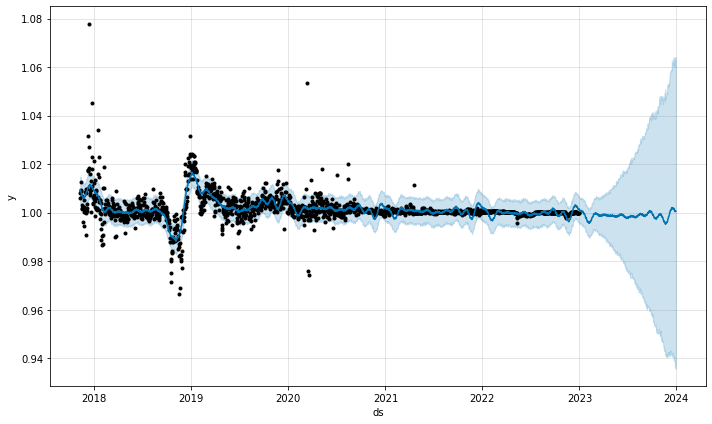

In [36]:
plot1 = m.plot(forecast)